In [1]:
from autqec.automorphisms import *
from autqec.utils.qec import *
from autqec.utils.qiskit import *
from autqec.magma_interface import *
import pickle

## Codetables [[n,k,d]]
Below the user can change $n$ and $k$, where $n \leq 50$ & $k \leq 50$ to find the SWAP-transversal gates of best-known distance codes in codetables.de up to $50$ physical qubits. 

#### Define code e.g. [[8,3,3]]

In [2]:
# define code
n = 8
k = 3
d = '_'

H_symp = np.load(f'../codetables/parity_checks/H_symp_n{n}k{k}.npy')

#### Standard form of code

In [3]:
G, LX, LZ, D = compute_standard_form(H_symp)

#### Automorphism group generators from MAGMA 

In [4]:
#code_auts_dict = qec_code_auts_from_magma_with_intersection(n,k,d,H_symp).run(fileroot='./auts_data/')
filename = f'../codetables/auts_data_w_intersection/auts_n{n}k{k}d{d}.pkl'
with open(filename, 'rb') as f:
    code_auts_dict = pickle.load(f)
print('Aut Group Order: ', code_auts_dict['order'])
print('Time: ', code_auts_dict['time'])
print('No of aut gens: ', len(code_auts_dict['auts']))

Aut Group Order:  168
Time:  0.01
No of aut gens:  5


In [5]:
auts = code_auts_dict['auts']
circuits = []
for num, aut in enumerate(auts):
    phys_act = circ_from_aut(H_symp,aut)        
    phys_circ, _ = phys_act.circ()
    circ = logical_circ_and_pauli_correct(H_symp,phys_circ).run()
    circuits.append(circ)

### Logical gate 1

[('CZ', (1, 2))]


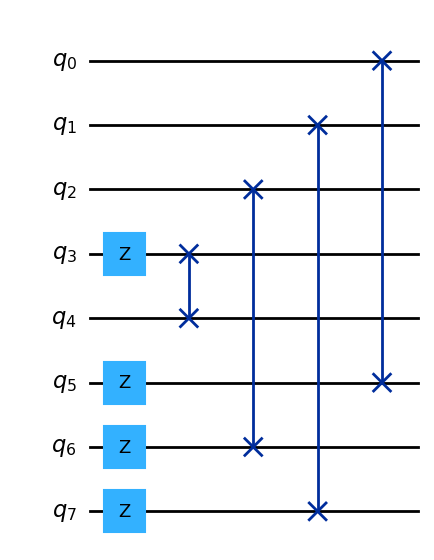

In [6]:
# physical circuit
circ = circuits[0]
print(circ[0])
qc = construct_circuit(circ[1], n)
qc.draw(output='mpl')

### Logical gate 2

[('CZ', (2, 3))]


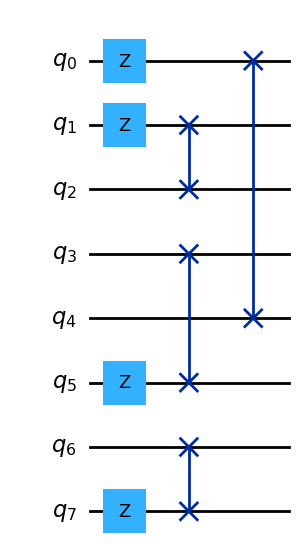

In [7]:
# physical circuit
circ = circuits[1]
print(circ[0])
qc = construct_circuit(circ[1], n)
qc.draw(output='mpl')

### Logical gate 3

[('CZ', (1, 3))]


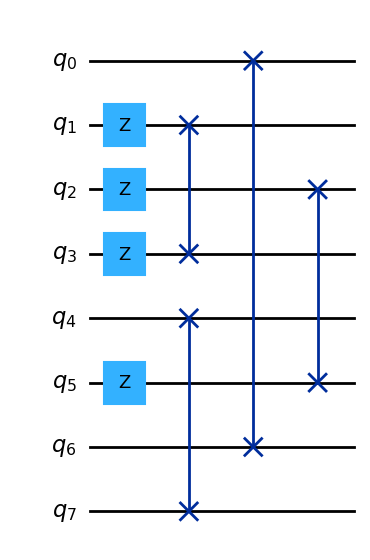

In [8]:
# physical circuit
circ = circuits[2]
print(circ[0])
qc = construct_circuit(circ[1], n)
qc.draw(output='mpl')